<a href="https://colab.research.google.com/github/kimyuji/AI_Assignment/blob/main/CNN_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 필요한 module import
import torch
import torchvision # CIFAR10
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torchsummary as summary

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
%matplotlib inline

## 1. Hyperparameters

In [ ]:
# Device Configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Model
num_classes = 10 # 10 classes
in_channel = 3 # color images

# Hyperparameters
batch_size = 1000
learning_rate = 0.001
num_epochs = 30

## 2. Load data & Dataloader

In [ ]:
train_data = torchvision.datasets.CIFAR10(root='./datasets',
                                          train = True, # 이미 잘 정리된 데이터, 그 중 train set을 가져오자
                                          transform=transforms.ToTensor(),
                                          download=True)
test_data = torchvision.datasets.CIFAR10(root='./datasets',
                                          train = False, 
                                          transform=transforms.ToTensor(),
                                          download=True)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
train_loader = torch.utils.data.DataLoader(dataset=train_data,
                                          batch_size=batch_size,
                                          shuffle=True) #필수
test_loader = torch.utils.data.DataLoader(dataset=test_data,
                                          batch_size=batch_size,
                                          shuffle=True)

## 3. Define a Model

In [ ]:
class img_class(nn.Module):
  def __init__(self, num_classes=10):
    super(img_class, self).__init__()
    self.layer1 = nn.Sequential(
        nn.Conv2d(in_channel, 6, 5, padding=1),
        nn.BatchNorm2d(6),
        nn.ReLU(),
        nn.MaxPool2d(2,2),
    )    

    self.layer2 = nn.Sequential(
        nn.Conv2d(6, 16, 5, padding=1),
        nn.BatchNorm2d(16),
        nn.ReLU(),
        nn.MaxPool2d(2, 2),
    )
    self.fc1 = nn.Linear(in_features=6*6*16, out_features=120)
    self.fc2 = nn.Linear(in_features=120, out_features=84)
    self.fc3 = nn.Linear(in_features=84, out_features=num_classes)

  def forward(self, x):
    # 1-layer
    x = self.layer1(x)
    # 2-layer
    x = self.layer2(x)
    
    # 3-layer
    x = self.fc1(x.reshape(x.size(0), -1))    
    x = F.relu(x)
    # 4-layer
    x = self.fc2(x)
    # out-layer
    x = self.fc3(x)
    return x



model = img_class()

In [ ]:
print(model)

img_class(
  (layer1): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


## 4. Loss & Optimizer

In [ ]:
model = img_class().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

## 5. Train Model

In [ ]:
total_step = len(train_loader)
error=[] 

for epoch in range(num_epochs):
  for i, (img, label) in enumerate(train_loader):
    # Assign Tensors to Configures Devices (gpu)
    img = img.to(device)
    label = label.to(device)

    # Forward propagation
    outputs = model(img)

    # Get Loss, Compute Gradient, Update Parameters
    batch_loss = 0.0
    loss = criterion(outputs, label)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    batch_loss += loss.item()
    error.append(batch_loss) #.detach().numpy()
    
    # Print Loss
    if i % 100000 == 0 or (i+1)==len(train_loader):
      print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, i+1, len(train_loader), loss.item()))
print("----------Learning Finished----------")

Epoch [1/30], Step [1/50], Loss: 2.3263
Epoch [1/30], Step [50/50], Loss: 1.4504
Epoch [2/30], Step [1/50], Loss: 1.4990
Epoch [2/30], Step [50/50], Loss: 1.3205
Epoch [3/30], Step [1/50], Loss: 1.3329
Epoch [3/30], Step [50/50], Loss: 1.2199
Epoch [4/30], Step [1/50], Loss: 1.2787
Epoch [4/30], Step [50/50], Loss: 1.2031
Epoch [5/30], Step [1/50], Loss: 1.1237
Epoch [5/30], Step [50/50], Loss: 1.1746
Epoch [6/30], Step [1/50], Loss: 1.1532
Epoch [6/30], Step [50/50], Loss: 1.0933
Epoch [7/30], Step [1/50], Loss: 1.0523
Epoch [7/30], Step [50/50], Loss: 1.0526
Epoch [8/30], Step [1/50], Loss: 1.0699
Epoch [8/30], Step [50/50], Loss: 1.0096
Epoch [9/30], Step [1/50], Loss: 1.0204
Epoch [9/30], Step [50/50], Loss: 0.9315
Epoch [10/30], Step [1/50], Loss: 0.9959
Epoch [10/30], Step [50/50], Loss: 0.9352
Epoch [11/30], Step [1/50], Loss: 0.9585
Epoch [11/30], Step [50/50], Loss: 0.9036
Epoch [12/30], Step [1/50], Loss: 0.8550
Epoch [12/30], Step [50/50], Loss: 0.8769
Epoch [13/30], Step [1

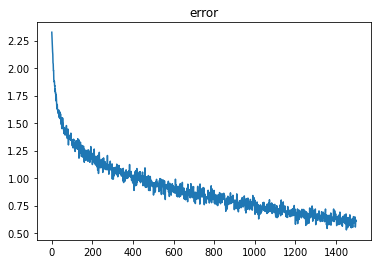

In [ ]:
plt.plot(error)
plt.title('error')
plt.show()

## 6. Save Model

In [ ]:
torch.save(model.state_dict(),"model.pth")

## 7. Test Model

In [ ]:
test_model = img_class().to(device)

test_model.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

In [ ]:
test_model.eval() #evaluation mode

with torch.no_grad():
  correct = 0
  
  for img, lab in test_loader:
    img = img.to(device)
    lab = lab.to(device)
    out = test_model(img)
    _, pred = torch.max(out.data, 1)
    correct += (pred == lab).sum().item()

  print("Accuracy of the network on the {} test images: {}%".format(len(test_loader)*batch_size, 100 * correct / (len(test_loader) * batch_size)))

Accuracy of the network on the 10000 test images: 66.82%
